In [1]:
import json
import pandas as pd
import os
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
log_path = '../Data/ML/2024-03-14/log/'
log_list = os.listdir(log_path)

In [4]:
hidden_list = []
layer1_train= []
layer1_train_list = []
layer2_train_list = []

layer1_time_list = []
layer2_time_list = []
for hidden in log_list:
    hidden_list.append(int(hidden))
    for layer in os.listdir(os.path.join(log_path,hidden)):
        # log
        df = pd.read_csv(os.path.join(log_path,hidden,layer,'log.csv'))
        last_cal = df['Test'].min()
        if layer == '1':
            layer1_train_list.append(float(last_cal))
        else:
            layer2_train_list.append(float(last_cal))

        # json
        json_path = os.path.join(log_path,hidden,layer)
        temp = 0 
        for number in range(len(os.listdir(json_path))-2):

            with open(os.path.join(log_path,hidden,layer,'trace'+str(number)+'.json'), 'r') as file:
                # Step 2: Parse the JSON file
                data = json.load(file)
                specific_data = data['traceEvents']
                time = specific_data[0]['dur']
                temp += time
        avg_time = temp / len(os.listdir(json_path))-1
        
        if layer == '1':
            layer1_time_list.append(float(time))
        else:
            layer2_time_list.append(float(time))



[]

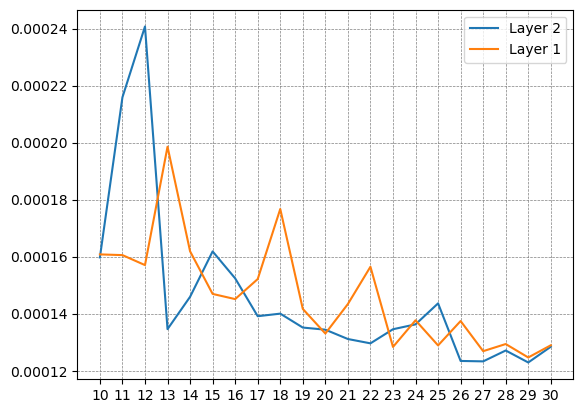

In [5]:
plt.plot(hidden_list,layer2_train_list, label='Layer 2')
plt.plot(hidden_list,layer1_train_list, label='Layer 1')
plt.grid(color='gray', linestyle='--',linewidth=0.5)
plt.legend()
plt.xticks(range(10, 31))
plt.plot()

[]

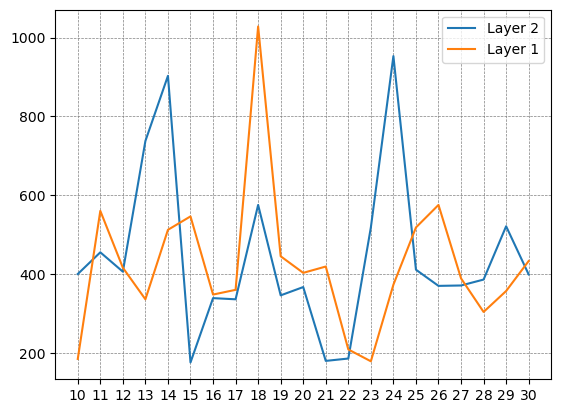

In [6]:
plt.plot(hidden_list,layer2_time_list, label='Layer 2')
plt.plot(hidden_list,layer1_time_list, label='Layer 1')
plt.grid(color='gray', linestyle='--',linewidth=0.5)
plt.legend()
plt.xticks(range(10, 31))
plt.plot()